# PLOTTING IN PYTHON

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('penguins_simple_giuditta.csv', sep=';') 

In [4]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


## 1. Plotting with pandas

0      3750.0
1      3800.0
2      3250.0
3      3450.0
4      3650.0
        ...  
328    4925.0
329    4850.0
330    5750.0
331    5200.0
332    5400.0
Name: Body Mass (g), Length: 333, dtype: float64


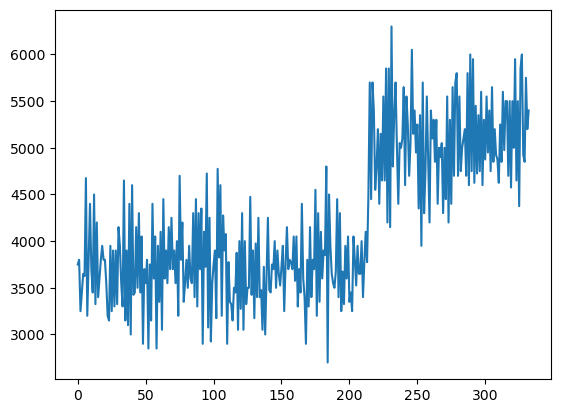

In [58]:
#plot one column
body_m = df['Body Mass (g)']
print(body_m)
body_m.plot();


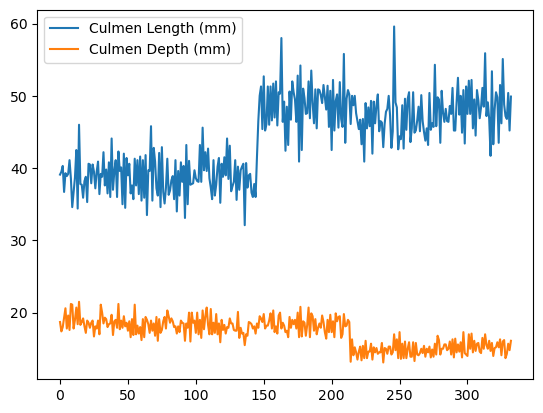

In [59]:
# plot two columns
data = df[['Culmen Length (mm)','Culmen Depth (mm)' ]]
data.plot();        

#### Let's try to answer following questions!
1. Do larger penguins have longer flippers?  

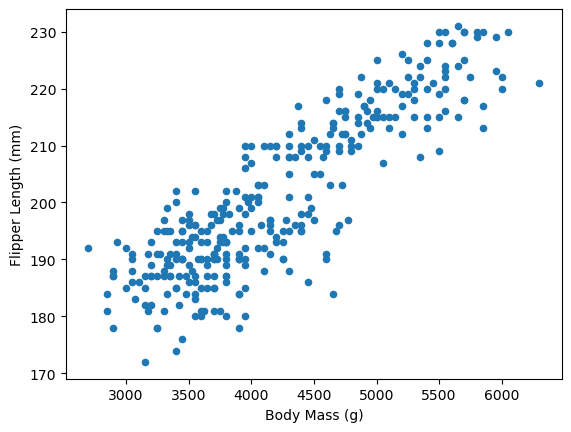

In [60]:
df.plot(x = "Body Mass (g)", y="Flipper Length (mm)", kind="scatter"); #Linear correlation

2. Visualize the distribution of Culmen Length

In [ ]:
#histogram, violin-plots, boxplots, ...

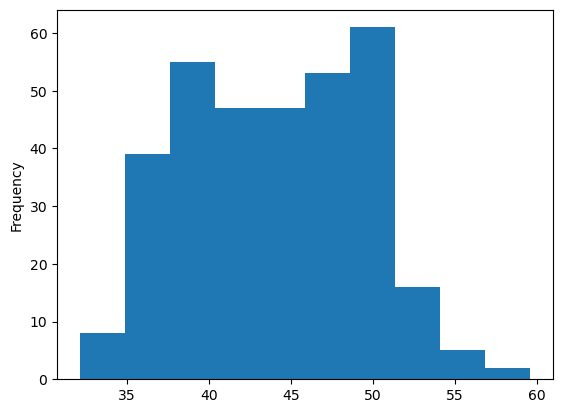

In [61]:
df["Culmen Length (mm)"].plot(kind='hist');

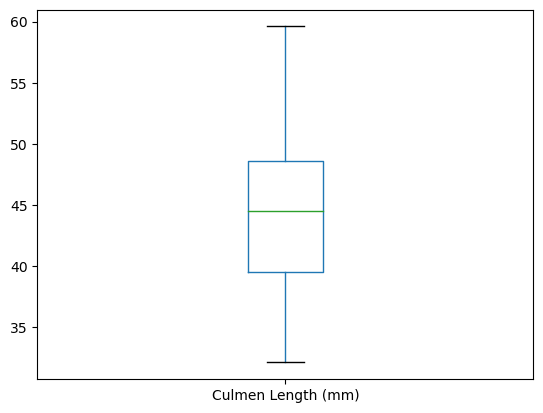

In [62]:
df["Culmen Length (mm)"].plot(kind='box'); #green line = median, box = middle 50%, 
#wiskers = highest and lower values

3. Are male penguins heavier than female penguins?

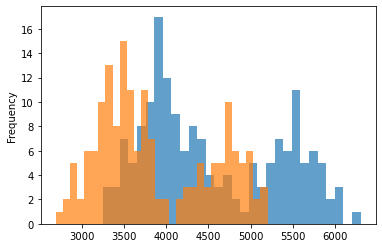

In [19]:
df_male = df[df['Sex']=='MALE']['Body Mass (g)'].plot(kind='hist', alpha = 0.7, bins = 30)
df_female = df[df['Sex']=='FEMALE'] ['Body Mass (g)'].plot(kind='hist', alpha = 0.7, bins = 30)

#### Other plots with pandas: 
check the documentation here: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

## 2. Plotting with Matplotlib

In [20]:
import matplotlib.pyplot as plt

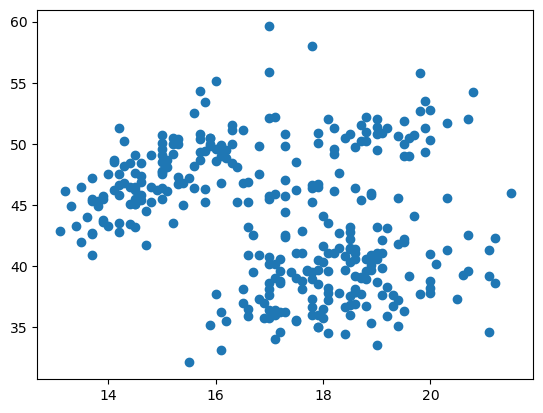

In [63]:
plt.scatter(x=df['Culmen Depth (mm)'], y=df['Culmen Length (mm)']);

#### Add title and labels

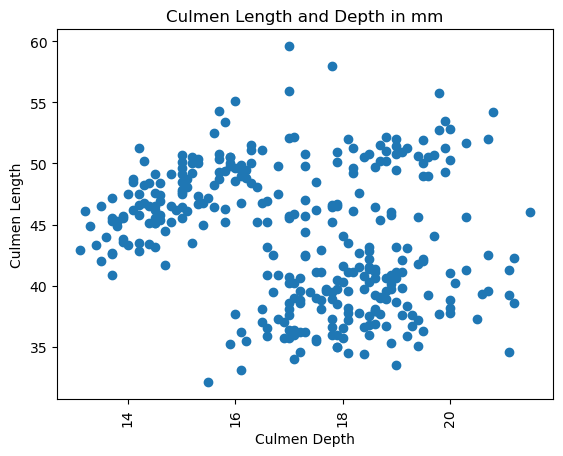

In [64]:
plt.scatter(x=df['Culmen Depth (mm)'], y=df['Culmen Length (mm)'])
plt.title("Culmen Length and Depth in mm")
plt.xlabel("Culmen Depth")
plt.ylabel("Culmen Length")
plt.xticks(rotation='vertical');
    

#### More formatting

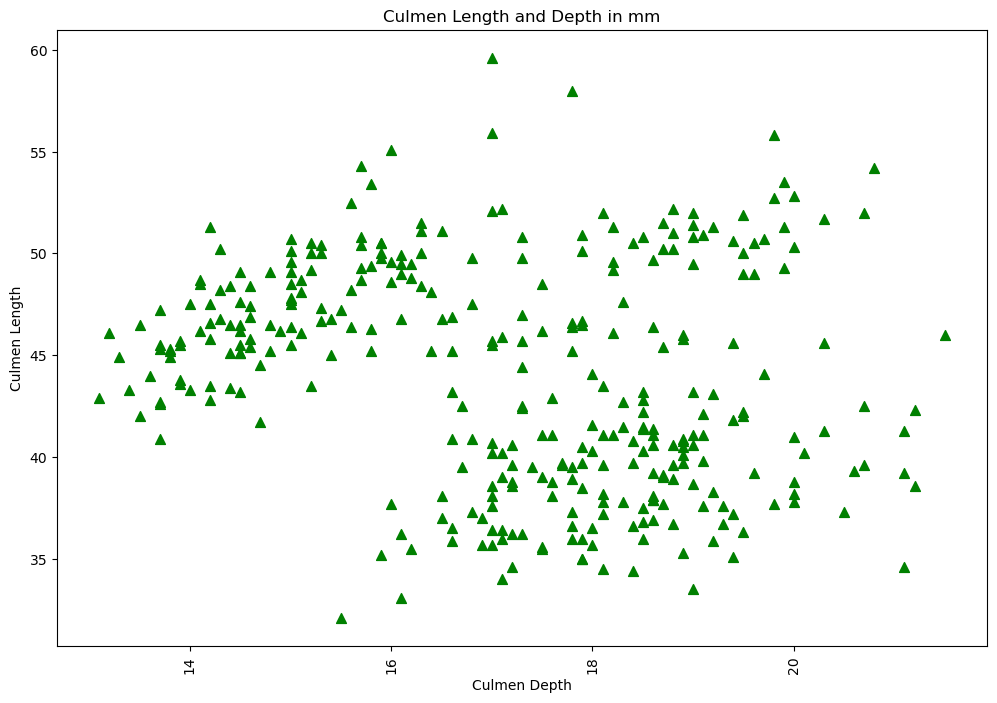

In [65]:
plt.figure(figsize=(12,8)) #order is important for the size pf the figure. It goes first!
plt.scatter(x=df['Culmen Depth (mm)'], y=df['Culmen Length (mm)'], c='green', s=50, marker="^" )
plt.title("Culmen Length and Depth in mm")
plt.xlabel("Culmen Depth")
plt.ylabel("Culmen Length")
plt.xticks(rotation='vertical');

### Multiple plots in one

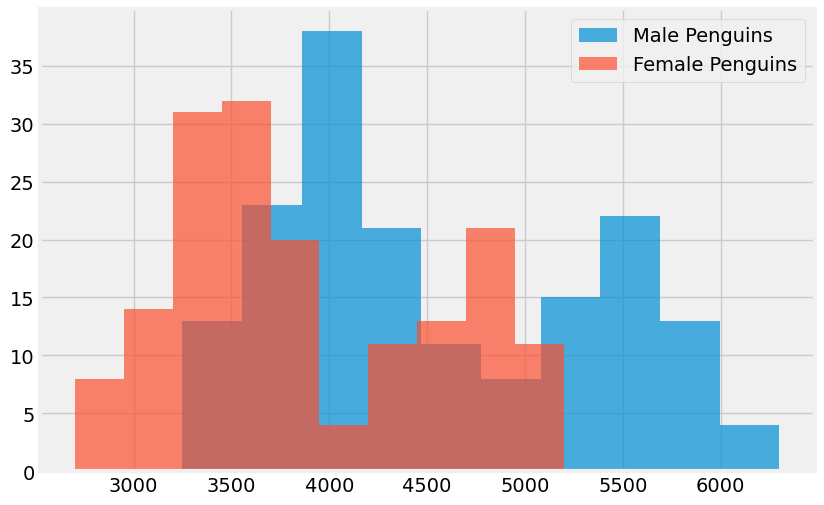

In [66]:
plt.figure(figsize = (10,6))
plt.style.use('fivethirtyeight')
plt.hist(df[df['Sex']=='MALE']['Body Mass (g)'], alpha = 0.7, label = "Male Penguins")
plt.hist(df[df['Sex']=='FEMALE']['Body Mass (g)'], alpha = 0.7, label = "Female Penguins")
plt.legend();

In [47]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### Saving plots

In [69]:
plt.savefig('plot1.png');

<Figure size 640x480 with 0 Axes>

Gallery: https://matplotlib.org/3.1.0/gallery/index.html  
Great youtube series on matplotlib: https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_

## 3. Plotting with Seaborn
- more examples in the course material

In [48]:
import seaborn as sns

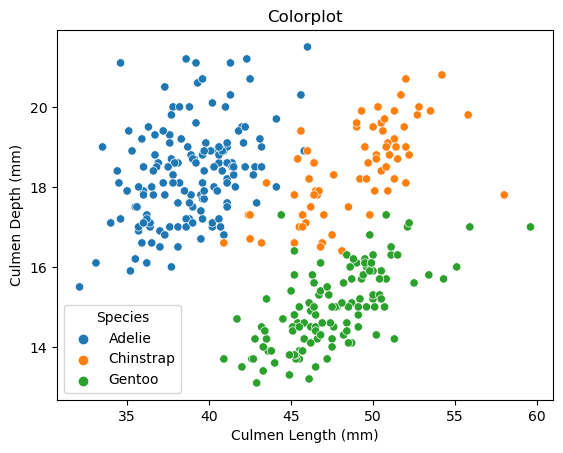

In [55]:
sns.reset_defaults() #colours are inherited in Jupyter (not always the case with other editors)
sns.scatterplot(data=df, x='Culmen Length (mm)', y='Culmen Depth (mm)', hue= 'Species')
plt.title("Colorplot");

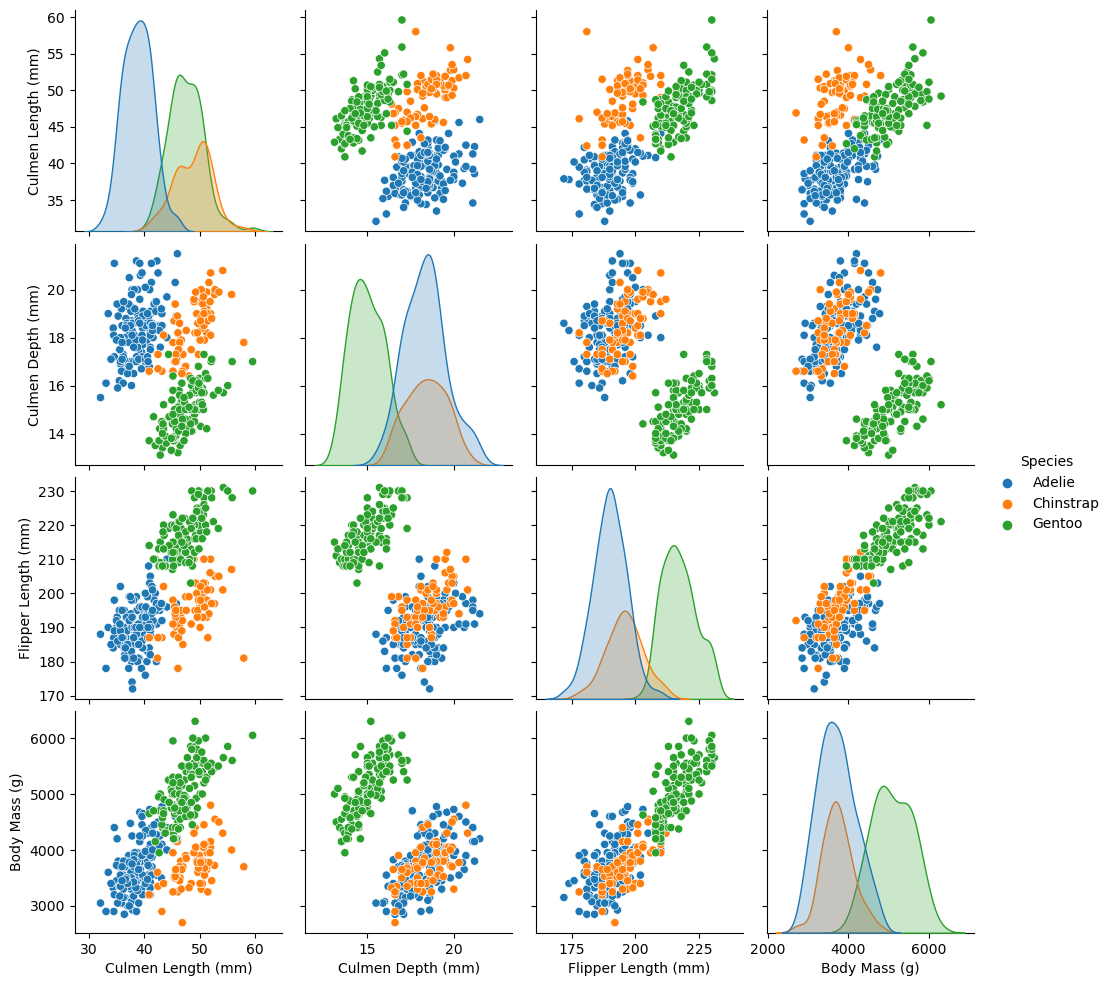

In [57]:
sns.pairplot(data=df, hue='Species');

Plotting inspiration:
    https://python-graph-gallery.com/  
Advice on how to use colors: https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization and https://projects.susielu.com/viz-palette

## Exercises with seaborn and matplotlib: 
- Draw a histogram that shows how many penguins of each species are in the data
- Create a plot of your choosing that only shows the data of female Gentoos.
- Create a scatterplot of the culmen length and depth where the size of the markers represent the Body mass of the penguin
- Find at least one more way (besides a scatterplot) to visualize the relationship between culmen lenght and depth (or another bivariate distribution)

### OPTIONAL: More advanced plotting: see course material chapter 1.10

#### Subplots
In matplotlib, the "figure" is like a container that holds plots (called "axes"). 
You can create a grid of plots, e.g. with two plots in one figure like this: 


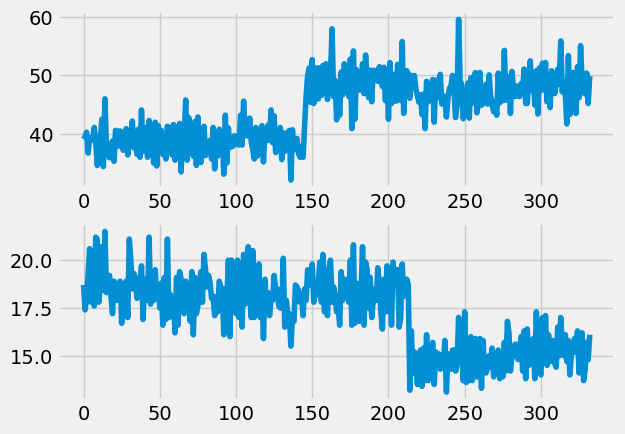

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1) 
ax1.plot(df['Culmen Length (mm)'])   #specifies first plot
ax2.plot(df['Culmen Depth (mm)']);     # specifies second plot

#### 3D plots

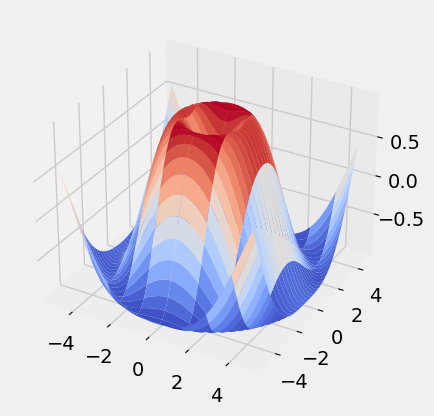

In [72]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=5, cmap=cm.coolwarm)
plt.show();

### Libraries for more plotting:  plotly, bokeh, d3